In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from jinja2 import escape
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,robust_scale,PolynomialFeatures,OneHotEncoder,LabelBinarizer
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import eli5
from scipy.stats import norm
%matplotlib inline
sns.set(style='white')
sns.set_palette('deep')
import os

In [2]:
df = pd.read_csv("../A21_python_labs/data/books.csv",sep=',',error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
categoricaldata=[]

for i in df.columns:
    if df[i].dtypes=="object":
        categoricaldata.append(i)

df[categoricaldata].describe()


,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Brothers Karamazov,Stephen King,0802415318,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


number of distinct publication_date : 3679
publication_date is of type : object 

2005-10-01 00:00:00    56
2005-11-01 00:00:00    53
2006-09-01 00:00:00    51
2006-10-01 00:00:00    48
2006-11-01 00:00:00    40
2006-08-01 00:00:00    39
2004-07-01 00:00:00    39
2004-10-01 00:00:00    37
2003-07-01 00:00:00    37
2005-08-01 00:00:00    37
Name: publication_date, dtype: int64
publication_date is now of type : datetime64[ns] 



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,num_occ,rate_occ,rate_weight,rate_weight_2,rate_per_pages
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,NaT,Scholastic Inc.,2006,2,9.14,126090.87,9577303.30,2979.64
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,NaT,Scholastic Inc.,2004,1,4.49,131202.29,9667719.83,3906.30
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,NaT,Scholastic,2003,2,8.84,1078.48,27991.86,1555.84
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,NaT,Scholastic Inc.,2004,2,9.12,165642.00,10668507.60,1983.60
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,NaT,Scholastic,2004,1,4.78,783.92,198025.84,12858.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,NaT,Da Capo Press,2004,1,4.06,81.20,633.36,2078.72
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,NaT,Penguin Books,1988,1,4.08,228.48,3194.64,2590.80
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,NaT,Penguin Books,1993,1,3.96,376.20,3247.20,1643.40
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,NaT,Ecco,2007,1,3.72,517.08,2860.68,1614.48


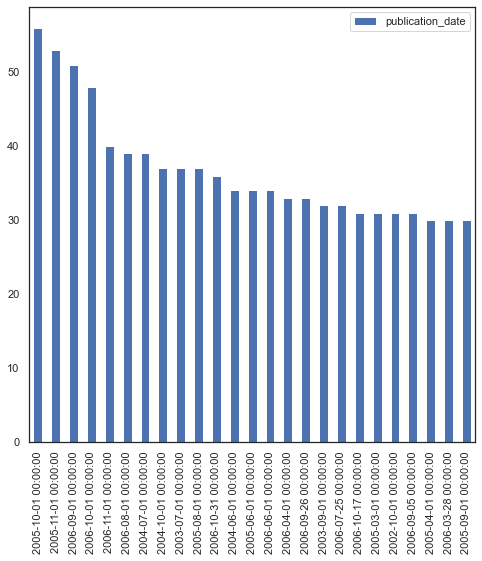

In [9]:
print ("number of distinct publication_date :" ,df["publication_date"].nunique())

print("publication_date is of type :",df.publication_date.dtypes,"\n")

print(df["publication_date"].value_counts().head(10))

df["publication_date"].value_counts().head(25).plot(kind='bar',figsize=(8,8)).legend()

# Convert data type of publication_date from object into date type

df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')

print("publication_date is now of type :",df.publication_date.dtypes,"\n")

df[df['publication_date'].isnull()]#checking if all values are well-formed





#Since there are only 2 books with courrpted dates, I googled these 2 books to get the publication dates and put them manually

df.loc[df.bookID == 31373, 'publication_date'] = '1999-10-01'

df.loc[df.bookID == 45531, 'publication_date'] = '1975-10-01'

df[df['publication_date'].isnull()]








number of distinct languages : 24 

eng    10537
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
enm        3
lat        3
swe        2
rus        2
tur        1
gla        1
nor        1
msa        1
glg        1
ara        1
wel        1
ale        1
nl         1
srp        1
Name: language_code, dtype: int64


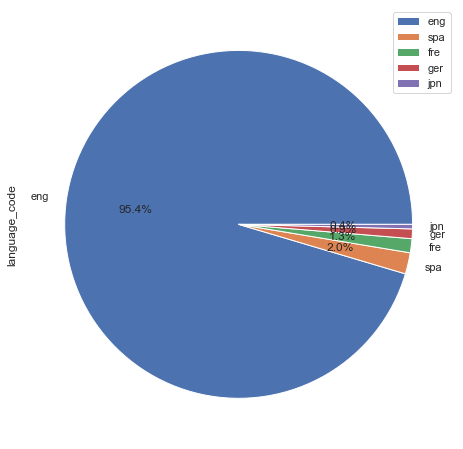

In [10]:

#- language_code

print ("number of distinct languages :" ,df["language_code"].nunique(),"\n")

print(df["language_code"].value_counts())




#since en-US ,en-GB , en are english we can group them into a same language-code

encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} # Unify the langauge codes

df.replace(encoding, inplace=True)





df["language_code"].value_counts().head(5).plot(kind='pie',autopct='%1.1f%%',figsize=(8,8)).legend()

#95.4% of books are written in general english




number of distinct title : 10348 

The Brothers Karamazov        9
The Iliad                     9
Anna Karenina                 8
Gulliver's Travels            8
The Odyssey                   8
'Salem's Lot                  8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
Macbeth                       6
Collected Stories             6
Name: title, dtype: int64


<AxesSubplot:>

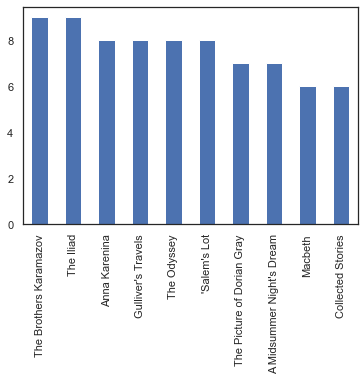

In [11]:
#- title

print ("number of distinct title :" ,df["title"].nunique(),"\n")

print(df["title"].value_counts().head(10))

df["title"].value_counts().head(10).plot(kind='bar')



In [ ]:
#- authors

print ("number of distincts authors :" ,df["authors"].nunique(),"\n")

print(df["authors"].value_counts().head(10))

df["authors"].value_counts().head(10).plot(kind='bar')



In [ ]:
#- publisher

print ("number of distincts publisher :" ,df["publisher"].nunique(),"\n")

print(df["publisher"].value_counts().head(10))

df["publisher"].value_counts().head(10).plot(kind='bar')



In [ ]:
#- isbn

print ("number of distinct isbn :" ,df["isbn"].nunique(),"\n")

print(df["isbn"].value_counts().head(10))

print("all isbn number is different from each other")

#sns.boxplot(data=(df[numericaldata]), orient="v", palette="Set2")

#plt.show()

#sns.swarmplot(df[categoricaldata].any(), y=df.average_rating, color=".25")

#ax = sns.boxplot(data=iris_long, x="value", y="variable", orient="h", palette="Set2", hue="species")

#plt.tight_layout()

#plt.show()






In [ ]:

#b- Numerical Data.

# Extract year of publication in a separate column

df['year'] = pd.DatetimeIndex(df['publication_date']).year 





# Rename the column to remove leading whitespaces

df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)





# Add a new feature which has the number of occurences of each book

df['num_occ'] = df.groupby('title')['title'].transform('count') 

 
    
    

df['rate_occ'] = df['average_rating'] * df['num_occ']

df['rate_weight'] = df['average_rating'] * df['text_reviews_count']

df['rate_weight_2'] = df['average_rating'] * df['ratings_count']

df['rate_per_pages'] = df['average_rating'] * df['num_pages']

df
